In [1]:
# %matplotlib inline
import pulp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate the input data
a = np.array([[2, 1], [2, -1], [-1, 2], [-1, -2]])
b = np.ones((4, 1))

In [3]:
# solve model
model = pulp.LpProblem('Chebyshev_center', pulp.LpMaximize)
r = pulp.LpVariable('r', cat='Continuous')
x_c = pulp.LpVariable.matrix('x_c', range(0,2) ,cat='Continuous')

model += r

for i in range(len(a)):
    model += pulp.lpSum(a[i].T * x_c) + r * np.linalg.norm(a[i]) <= b[i]

In [28]:
# Solve our problem
model.solve()
print(pulp.LpStatus[model.status])

# Print our decision variable values
for v in model.variables():
    print(v.name, "=", v.varValue)

Optimal
r = 0.4472136
x_c_0 = 1.1180506e-12
x_c_1 = 1.1180713e-12


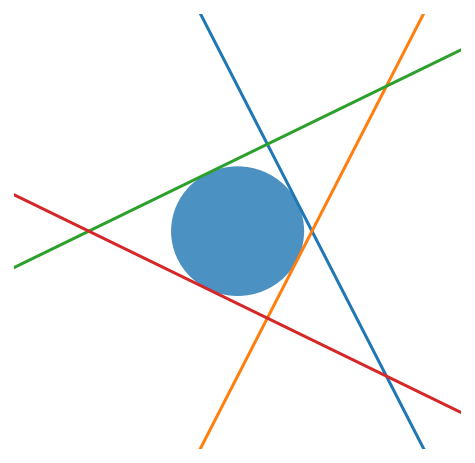

In [29]:
# plot
x = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(figsize=(4,4),dpi=144)
ax.set(xlim=(-1.5, 1.5), ylim = (-1.5, 1.5))
circle = plt.Circle((x_c[0].varValue, x_c[1].varValue), radius=r.varValue, alpha=0.8)
ax.add_patch(circle)
for i in range(len(a)):
    plt.plot(x, -x*a[i][0]/a[i][1]+b[i]/a[i][1])
ax.axis('off')
plt.savefig('figures/circle1.png', dpi=900)
plt.show()

In [9]:
r

r